In [3]:
import numpy as np
import pandas as pd
import xarray as xr
from rasterio.enums import Resampling

from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [4]:
in_dir = Path('~/scratch/spicy/SnowEx-Data/').expanduser().resolve()
in_dir = Path('~/spicy-snow/SnowEx-Data-Hans/').expanduser().resolve()

out_dir = Path('~/scratch/spicy/experimental_SnowEx-Hans-s1').expanduser()

dss = {fp.stem: xr.open_dataset(fp) for fp in in_dir.glob('*.nc')}

old = xr.open_dataset('~/scratch/SD_20180126.nc')

data_dir = Path('/bsuhome/zacharykeskinen/scratch/experimental_sentinel1_snow_depth_data')
out_dir = Path('~/scratch/spicy/experimental_SnowEx-Hans-s1').expanduser()
fps = list(data_dir.glob('*.nc'))

for stem, old_ds in dss.items():
    new_dss = []
    print(stem)
    for fp in fps:
        dt = pd.to_datetime(fp.stem.split('_')[1])
        if dt > pd.to_datetime('2019-08-01') and dt < pd.to_datetime('2021-04-01'):
            ds = xr.open_dataset(fp)['snd']
            ds = ds.isel(ease2_x = slice(0, 34703))
            ds = xr.DataArray(ds.data, dims = ['lon','lat'], coords = {'lon': ('lon', old.lon.data), 'lat': ('lat', old.lat.data[::-1])})
            ds = ds.expand_dims(time = [dt])
            ds = ds.sel(lat = slice(old_ds.y.max(), old_ds.y.min()), lon = slice(old_ds.x.min(), old_ds.x.max()))
            new_dss.append(ds)

    full = xr.concat(new_dss, dim = 'time')
    full = full.dropna(dim ='time', how ='all').sortby('time')
    full = full.rename({'lat':'y'})
    full = full.rename({'lon':'x'})

    full.to_netcdf(out_dir.joinpath(stem+'.nc'))

Mores_2020-02-09


KeyboardInterrupt: 

In [3]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error

def bias(x, y): return np.mean(x - y)

def get_stats(x, y):
    if type(x) == xr.DataArray: x = x.values.ravel()
    if type(y) == xr.DataArray: y = y.values.ravel()
    if type(x) == list: x = np.array(x)
    if type(y) == list: y = np.array(y)
    idx = (~np.isnan(x)) & (~np.isnan(y))
    x, y = x[idx], y[idx]
    r, p = pearsonr(x, y)
    b = bias(x, y)
    mae = mean_absolute_error(x, y)
    rmse = mean_squared_error(x, y, squared = False)
    return r, b, mae, rmse

In [46]:
in_dir = Path('~/scratch/spicy/SnowEx-Data/').expanduser().resolve()
in_dir = Path('~/spicy-snow/SnowEx-Data-Hans/').expanduser().resolve()

out_dir = Path('~/scratch/spicy/experimental_SnowEx-Hans-s1').expanduser()

dss = {fp.stem: xr.open_dataset(fp) for fp in in_dir.glob('*.nc')}

data_dir = Path('~/scratch/West_US_Canada').expanduser()
# this is just to get lats and longs
old = xr.open_dataset('~/scratch/SD_20180126.nc')

data_dir = Path('/bsuhome/zacharykeskinen/scratch/experimental_sentinel1_snow_depth_data')
assert data_dir.exists()
fps = list(data_dir.glob('*.nc'))

In [ ]:

full = xr.concat(new_dss, dim = 'time')
full = full.dropna(dim ='time', how ='all').sortby('time')
full = full.rename({'lat':'y'})
full = full.rename({'lon':'x'})

full.to_netcdf(out_dir.joinpath(stem+'.nc'))

In [73]:
ds = xr.open_dataarray(fps[0]).isel(ease2_x = slice(0, 34703))
ds = xr.DataArray(ds.data, dims = ['lon','lat'], coords = {'lon': ('lon', old.lon.data), 'lat': ('lat', old.lat.data)})
ds = ds.expand_dims(time = [dt])

In [84]:
old

<xarray.Dataset>
Dimensions:    (lon: 34703, lat: 4500)
Coordinates:
  * lon        (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat        (lat) float64 22.6 22.61 22.62 22.63 ... 84.74 84.83 84.91 85.0
Data variables:
    snc        (lon, lat) float32 ...
    snd_ini    (lon, lat) float32 ...
    flags_ini  (lon, lat) float64 ...
    snd_upd    (lon, lat) float32 ...
    flags_upd  (lon, lat) float64 ...

In [83]:
xr.DataArray(ds.data, dims = ['lon','lat'], coords = {'lon': ('lon', old.lon.data), 'lat': ('lat', old.lat.data)})

<xarray.DataArray (lon: 34703, lat: 4500)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat      (lat) float64 22.6 22.61 22.62 22.63 ... 84.74 84.83 84.91 85.0

In [74]:
for stem, old_ds in dss.items():
    new_dss = []
    for fp in fps:
        dt = pd.to_datetime(fp.stem.split('_')[1])
        if dt > pd.to_datetime('2019-08-01') and dt < pd.to_datetime('2021-04-01'):
            ds = xr.open_dataset(fp)['snd']
            ds = ds.isel(ease2_x = slice(0, 34703))
            ds = xr.DataArray(ds.data, dims = ['lon','lat'], coords = {'lon': ('lon', old.lon.data), 'lat': ('lat', old.lat.data)})
            ds = ds.expand_dims(time = [dt])
            ds = ds.sel(lat = slice(old_ds.y.min(), old_ds.y.max()), lon = slice(old_ds.x.min(), old_ds.x.max()))
            new_dss.append(ds)

    full = xr.concat(new_dss, dim = 'time')
    full = full.dropna(dim ='time', how ='all').sortby('time')
    full = full.rename({'lat':'y'})
    full = full.rename({'lon':'x'})

    full.to_netcdf(out_dir.joinpath(stem+'.nc'))

KeyboardInterrupt: 

In [5]:
b_21 = xr.open_dataset('~/spicy-snow/SnowEx-Data-Hans/Banner_2021-03-15.nc')['snow_depth'].transpose('time', 'y', 'x').rio.write_crs('EPSG:4326').drop('relative_orbit')
b_20 = xr.open_dataset('~/spicy-snow/SnowEx-Data-Hans/Banner_2020-02-18.nc')['snow_depth'].transpose('time', 'y', 'x').rio.write_crs('EPSG:4326').drop('relative_orbit')
b_20 = b_20.rio.reproject_match(b_21)
b = xr.concat([b_20, b_21], dim ='time')

banner_hans = xr.open_dataarray(data_dir.joinpath('combo.nc')).dropna(dim ='time', how ='all').sortby('time')
banner_hans = banner_hans.rename({'lat':'y'})
banner_hans = banner_hans.rename({'lon':'x'})

banner_hans= banner_hans.rio.write_crs('EPSG:4326')
banner_hans = banner_hans.rio.write_nodata(np.nan)
b = b.rio.write_crs('EPSG:4326')
b = b.rio.write_nodata(np.nan)
b= b.interpolate_na('x', limit = 10)
b= b.sortby('y').interpolate_na('y', limit=10)
b = b.interp_like(banner_hans, method = 'linear') # .interpolate_na('x', method = 'nearest').sortby('y').interpolate_na('y', method = 'nearest')

mg = xr.merge([b, banner_hans])

In [76]:
out_dir = Path('~/scratch/spicy/experimental_SnowEx-Hans-s1').expanduser()
full = xr.concat(new_dss, dim = 'time')
full = full.dropna(dim ='time', how ='all').sortby('time')
full = full.rename({'lat':'y'})
full = full.rename({'lon':'x'})

full.to_netcdf(out_dir.joinpath(stem+'.nc'))

In [77]:
full = xr.concat(new_dss, dim = 'time')


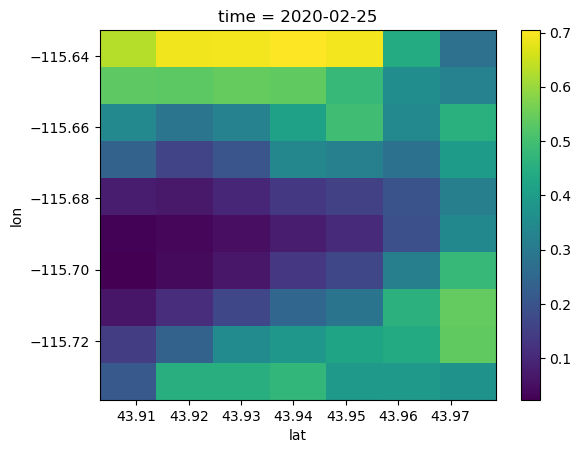

In [82]:
full.sortby('time').dropna('time', how = 'all').isel(time= 4).plot()

In [68]:
xr.open_dataarray('/bsuhome/zacharykeskinen/scratch/spicy/experimental_SnowEx-Hans-s1/Mores_2020-02-09.nc')

<xarray.DataArray (time: 0, x: 10, y: 7)>
[0 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 
  * x        (x) float64 -115.7 -115.7 -115.7 -115.7 ... -115.7 -115.6 -115.6
  * y        (y) float64 43.91 43.92 43.93 43.94 43.95 43.96 43.97